# Gift coupons: Web Scraping [ Part I ]

This notebook contains primary data analysis and identification of data issues after web scraping.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
plt.style.use('seaborn')

In [5]:
with open('scraped_data_utf8.json') as file:
    data = json.loads(file.read())

In [12]:
# Make urls clickable
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

In [13]:
df = pd.DataFrame.from_dict(data,  orient='index')
style = df.style.format({'url': make_clickable})
print(df.shape)
df.head()

(640, 8)


,title,category,price,location,users,rating,votes,url
0,Dronų pilotavimo pamoka,Oro pramogos,29.00,Vilnius,"1,2",None,None,https://www.geradovana.lt/dronu-pilotavimo-pam...
1,Dovanų kortelė | GERA DOVANA,Oro pramogos,None,"Vilnius(aps.),Kaunas(aps.),Klaipėda(aps.),Pala...","Neribojama,1,2,3+",4.5,2,https://www.geradovana.lt/dovanu-kortele--gera...
2,Dovanų rinkinys ATITRŪK,Oro pramogos,199.00,"Vilnius,Kaunas(aps.),Klaipėda(aps.),Palanga,Dr...","1,2",4.6,7,https://www.geradovana.lt/dovanu-rinkinys-atit...
3,Vakarienės prenumerata,Pramogos namuose,None,"Vilnius,Kaunas",Neribojama,5.0,2,https://www.geradovana.lt/vakarienes-prenumera...
4,Žurnalo LAIMĖ prenumerata,Pramogos namuose,14.99,VisaLietuva,1,None,None,https://www.geradovana.lt/zurnalo-laima-prenum...


Data contains 640 unique items

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 0 to 639
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     640 non-null    object 
 1   category  640 non-null    object 
 2   price     574 non-null    float64
 3   location  637 non-null    object 
 4   users     604 non-null    object 
 5   rating    291 non-null    float64
 6   votes     291 non-null    object 
 7   url       640 non-null    object 
dtypes: float64(2), object(6)
memory usage: 65.0+ KB


In [25]:
# Convert columns to correct data types

dtypes_dict = {
    'price':float, 'rating':float, 'votes':float
}

df = df.astype(dtypes_dict, errors='ignore')

In [26]:
df.nunique()

title       640
category     14
price       174
location     86
users         9
rating       18
votes        31
url         640
dtype: int64

Data contains 640 unique items under 14 unique categories.

In [46]:
df.describe()

,price,rating,votes
count,574.000000,291.000000,291.000000
mean,92.834948,4.786598,6.154639
std,240.019488,0.514673,11.274635
min,2.990000,1.000000,1.000000
25%,25.000000,4.800000,1.000000
50%,45.000000,5.000000,2.000000
75%,98.000000,5.000000,6.500000
max,2990.000000,5.000000,95.000000


574 items have fixed price. 66 items have price range which buyer could set.

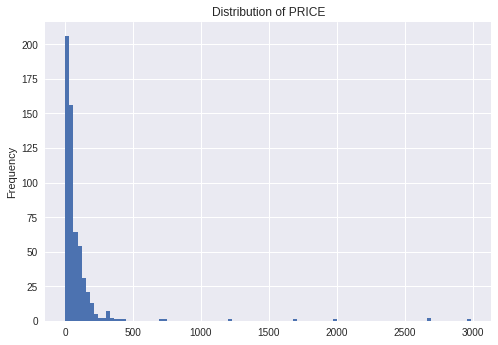

In [45]:
df.price.plot(kind='hist', bins=100)
plt.title("Distribution of PRICE")
plt.savefig("price.png", dpi=300);

50% of coupons costs under 45 Eur and 75% under 98 Eur. The data contains some very expensive. The last two most expesive items costs 2600 and 2900 Eur and offer helicopter ride and short-term rent of Estonian island accordingly.